In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1 Simple function

In [2]:
# 5 * 5 identity matrix
a = np.eye(5)

# 2 Linear regression with one variable
predict profits for a food truck.

**ex1data1.txt:** 
- population of a city
- profit of a food truck in that city

## 2.1 Plotting the data

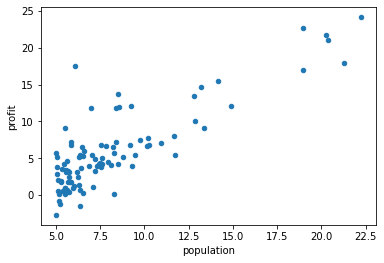

In [3]:
# read data
data = pd.read_csv('ex1data1.txt', sep=',', header=None, names=['population', 'profit'])

# scatter plot
data.plot.scatter(x = 'population', y = 'profit')
plt.show()

## 2.2 Gradient Descent
### 2.2.1 Update Equations

The objective of linear regression is to minimize the cost function.

$$J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-(y^{(i)}))^2$$

where $h_{\theta}(x)$ is given by the linear model
$$h_{\theta}(x)=\theta^Tx=\theta_0+\theta_1x_1$$

### 2.2.2 Implementation

Initialize the initial parameters to 0 and the learning rate alpha to 0.01.

In [4]:
# add a column of ones to x
data.insert(0, 'ones', 1)
X = data.iloc[:, 0:2]
y = data.iloc[:, [-1]]

# initialize fitting parameters
theta = np.zeros([2,1])

iterations = 1500
alpha = 0.01

In [5]:
# change pd.DataFrame to ny.matrix
X = np.matrix(X.values)
y = np.matrix(y.values)

### 2.2.3 Computing the cost
Implement a function to calculate $J(\theta)$ to check the convegence of the gradient descent implementation.

In [6]:
def computeCost(X, y, theta):
    tmp = np.power(((X * theta) - y), 2)
    J = np.sum(tmp) / (2 * len(X))
    return J
computeCost(X, y, theta)  # 32.072733877455676

32.072733877455676

### 2.2.4 Gradient descent
$$\theta_j:=\theta_j-\alpha\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$$

In [7]:
def gradientDescent(X, y, theta, alpha, iterations):
    thetaTemp = theta  # backup of theta
    dims = theta.shape[0]  # the number of j
    cost = np.zeros(iterations)  # cost array
    
    for i in range(iterations):
        t1 = (X * theta) - y
        for j in range(dims):
            t2 = t1.T.dot(X[:, j])
            t3 = alpha * (np.sum(t2) / len(X))
            thetaTemp[j, 0] = thetaTemp[j, 0] - t3
        theta = thetaTemp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

theta, cost = gradientDescent(X, y, theta, alpha, iterations)

after 1,500 iterations, the final $\theta$ will be used to make predictions on profits in areas of 35,000 and 70,000 people.

In [ ]:
predict1 = np.array([1, 3.5]).dot(theta)  # 0.45197679
predict2 = np.array([1, 7]).dot(theta)    # 4.53424501

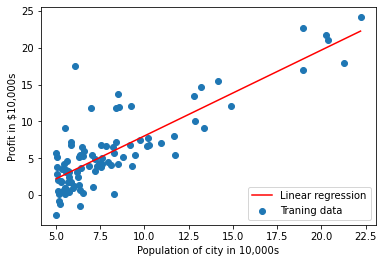

In [35]:
# draw a plot
x = np.linspace(data.min(axis = 0)['population'], data.max(axis = 0)['population'], 100)
fx = theta[0, 0] + theta[1, 0] * x

fig, ax = plt.subplots()
ax.plot(x, fx, 'r', label='Linear regression')
ax.scatter(data.population, data.profit, label='Traning data')
ax.legend(loc=4)
ax.set_xlabel('Population of city in 10,000s')
ax.set_ylabel('Profit in $10,000s')
plt.show()